In [10]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd

In [11]:
import numpy as np
import random as rd
class Kmeans:
    def __init__(self,X,K):
        self.X=X
        self.Output={}
        self.Centroids=np.array([]).reshape(self.X.shape[1],0)
        self.K=K
        self.m=self.X.shape[0]
        
    def kmeanspp(self,X,K):
        i=rd.randint(0,X.shape[0])
        Centroid_temp=np.array([X[i]])
        for k in range(1,K):
            D=np.array([]) 
            for x in X:
                D=np.append(D,np.min(np.sum((x-Centroid_temp)**2)))
            prob=D/np.sum(D)
            cummulative_prob=np.cumsum(prob)
            r=rd.random()
            i=0
            for j,p in enumerate(cummulative_prob):
                if r<p:
                    i=j
                    break
            Centroid_temp=np.append(Centroid_temp,[X[i]],axis=0)
        return Centroid_temp.T
    
    def fit(self,n_iter):
        #randomly Initialize the centroids
        self.Centroids=self.kmeanspp(self.X,self.K)
        
        """for i in range(self.K):
            rand=rd.randint(0,self.m-1)
            self.Centroids=np.c_[self.Centroids,self.X[rand]]"""
        
        #compute euclidian distances and assign clusters
        for n in range(n_iter):
            EuclidianDistance=np.array([]).reshape(self.m,0)
            for k in range(self.K):
                tempDist=np.sum((self.X-self.Centroids[:,k])**2,axis=1)
                EuclidianDistance=np.c_[EuclidianDistance,tempDist]
            C=np.argmin(EuclidianDistance,axis=1)+1
            #adjust the centroids
            Y={}
            for k in range(self.K):
                Y[k+1]=np.array([]).reshape(2,0)
            for i in range(self.m):
                Y[C[i]]=np.c_[Y[C[i]],self.X[i]]
        
            for k in range(self.K):
                Y[k+1]=Y[k+1].T
            for k in range(self.K):
                self.Centroids[:,k]=np.mean(Y[k+1],axis=0)
                
            self.Output=Y
            
    
    def predict(self):
        return self.Output,self.Centroids.T
    
    def WCSS(self):
        wcss=0
        for k in range(self.K):
            wcss+=np.sum((self.Output[k+1]-self.Centroids[:,k])**2)
        return wcss

In [12]:
dataset = pd.read_csv(r'C:\Users\AnkitaPal\Desktop\Development\BITS\BITS_Sem2\Data Mining\mushrooms_online.csv')

In [13]:
X = dataset.iloc[:, [3, 4]].values

In [14]:
dataset.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [15]:
m=X.shape[0]
n_iter=100

In [22]:
from Kmeans import Kmeans

ModuleNotFoundError: No module named 'Kmeans'

In [23]:
#to find optimum number of clusters use elbow method
WCSS_array=np.array([])
for K in range(1,11):
    kmeans=Kmeans(X,K)
    kmeans.fit(n_iter)
    Output,Centroids=kmeans.predict()
    wcss=0
    for k in range(K):
        wcss+=np.sum((Output[k+1]-Centroids[k,:])**2)
    #WCSS_array=np.append(WCSS_array,kmeans.WCSS())
    WCSS_array=np.append(WCSS_array,wcss)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

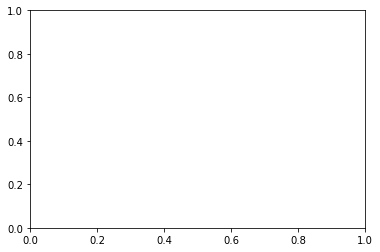

In [24]:
K_array=np.arange(1,11,1)
plt.plot(K_array,WCSS_array)
plt.xlabel('Number of Clusters')
plt.ylabel('within-cluster sums of squares (WCSS)')
plt.title('Elbow method to determine optimum number of clusters')
plt.show()

In [25]:
#based on these observations we choose 5 as optimum number of clusters
K=5

In [26]:
kmeans=Kmeans(X,K)
kmeans.fit(n_iter)
Output,Centroids=kmeans.predict()

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
color=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[:,0],Centroids[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()